In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read the CSV File with Age and Gender Data

In [29]:
df = pd.read_csv('Data\\2021_Federal_Census__Age_and_Gender_20231228.csv')

Clean up data 

In [30]:
# Ensure correct data types
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

Create a bar graph with total population for the while city

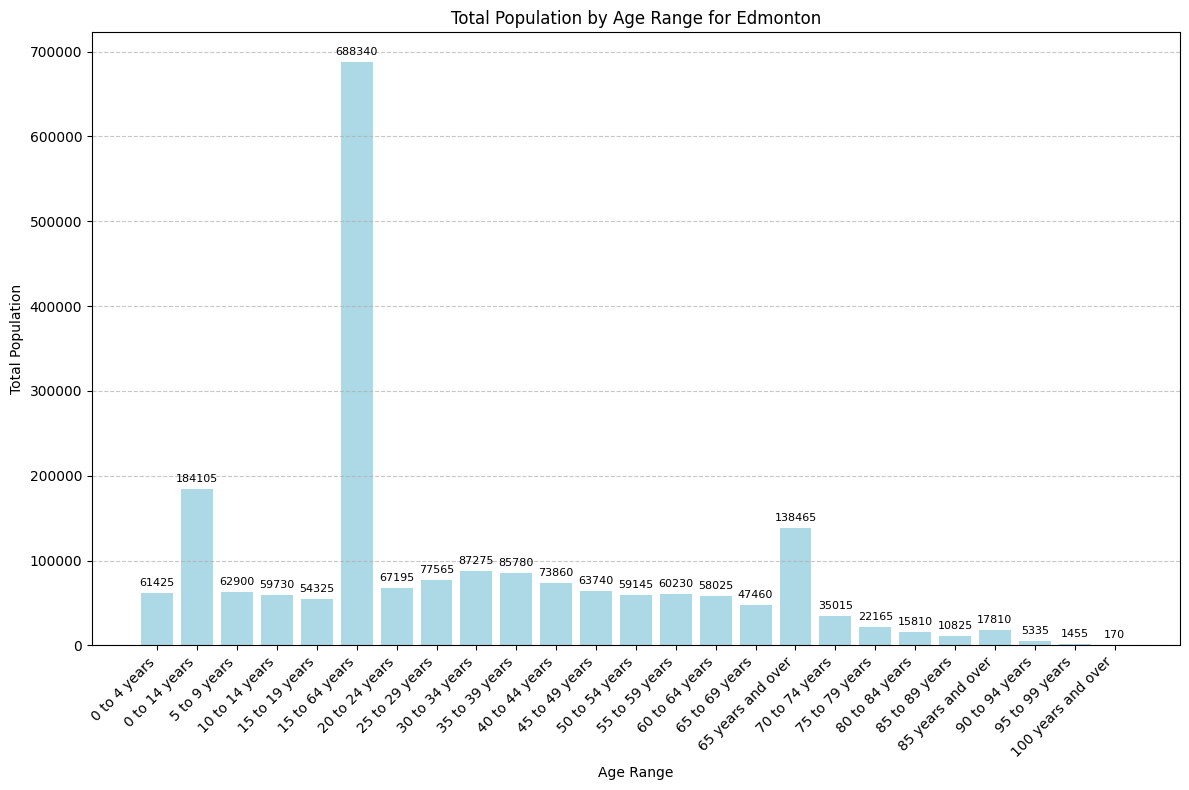

In [34]:
age_order = [
    '0 to 4 years',
    '0 to 14 years',
    '5 to 9 years',
    '10 to 14 years',
    '15 to 19 years',
    '15 to 64 years',
    '20 to 24 years',
    '25 to 29 years',
    '30 to 34 years',
    '35 to 39 years',
    '40 to 44 years',
    '45 to 49 years',
    '50 to 54 years',
    '55 to 59 years',
    '60 to 64 years',
    '65 to 69 years',
    '65 years and over',
    '70 to 74 years',
    '75 to 79 years',
    '80 to 84 years',
    '85 to 89 years',
    '85 years and over',
    '90 to 94 years',
    '95 to 99 years',
    '100 years and over'
]

# Filter data for the 'Total' category
total_df = df[df['Gender'].str.lower() == 'total']

# Aggregate and reindex the data by 'Age Range'
age_totals = total_df.groupby('Age Range')['Value'].sum().reindex(age_order).reset_index()

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Explicit positions and labels for the bars
bar_positions = np.arange(len(age_totals['Age Range']))
bar_labels = age_totals['Age Range']

# Plotting
bars = ax.bar(bar_positions, age_totals['Value'], color='lightblue')

# Set the x-axis labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(bar_labels, rotation=45, ha='right')

# Annotate each bar with its total value
for bar, total_value in zip(bars, age_totals['Value']):
    ax.annotate(str(total_value), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 5), textcoords='offset points',
                ha='center', fontsize=8, color='black')

# Labels and Title
ax.set_xlabel('Age Range')
ax.set_ylabel('Total Population')
ax.set_title('Total Population by Age Range for Edmonton')

# Grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()